# Part 2: Full Data Workflow A-Z

## Data Preparation and Feature Creation

### Arithmetic Operations

In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv("titanic.csv")

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
titanic.age.fillna(titanic.age.mean(), inplace = True)

In [7]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.000000,1,0,7.2500,S,NaN
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,S,NaN
3,1,1,female,35.000000,1,0,53.1000,S,C
4,0,3,male,35.000000,0,0,8.0500,S,NaN
5,0,3,male,29.699118,0,0,8.4583,Q,NaN
6,0,1,male,54.000000,0,0,51.8625,S,E
7,0,3,male,2.000000,3,1,21.0750,S,NaN
8,1,3,female,27.000000,0,2,11.1333,S,NaN
9,1,2,female,14.000000,1,0,30.0708,C,NaN


#### Add/Sub/Mul/Div of Columns

In [8]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [9]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [10]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [11]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [12]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [13]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [14]:
sales.Mon + sales.Thu

Steven      NaN
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [15]:
sales.Mon.add(sales.Thu, fill_value=0)

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [16]:
sales["perc_Bonus"] = [0.12, 0.15, 0.10, 0.20]

In [17]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus
Steven,34,27,15,NaN,33,0.12
Mike,45,9,74,87.0,12,0.15
Andi,17,33,54,8.0,29,0.10
Paul,87,67,27,45.0,7,0.20


In [18]:
sales.Thu * sales.perc_Bonus

Steven      NaN
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [19]:
sales.Thu.mul(sales.perc_Bonus, fill_value=0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [20]:
sales.iloc[:, :-1].sum(axis = 1)

Steven    109.0
Mike      227.0
Andi      141.0
Paul      233.0
dtype: float64

In [406]:
sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus)

Steven    13.08
Mike      34.05
Andi      14.10
Paul      46.60
dtype: float64

In [407]:
sales["Bonus"] = sales.iloc[:, :-1].sum(axis = 1).mul(sales.perc_Bonus)

In [408]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


#### Add/Sub/Mul/Div with Scaler Value

In [409]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat
0,0,3,male,22.0,1,0,7.2500,S,NaN,1
1,1,1,female,38.0,1,0,71.2833,C,C,1
2,1,3,female,26.0,0,0,7.9250,S,NaN,0
3,1,1,female,35.0,1,0,53.1000,S,C,1
4,0,3,male,35.0,0,0,8.0500,S,NaN,0


In [410]:
1912 - titanic.age

0      1890.000000
1      1874.000000
2      1886.000000
3      1877.000000
4      1877.000000
          ...     
886    1885.000000
887    1893.000000
888    1882.300882
889    1886.000000
890    1880.000000
Name: age, Length: 891, dtype: float64

In [411]:
titanic["YoB"] = titanic.age.sub(1912).mul(-1)

In [412]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890.0
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874.0
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886.0
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877.0
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877.0


In [413]:
fx_rate = 1.1

In [414]:
titanic["EUR_fare"] = titanic.fare.div(fx_rate)

In [415]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,YoB,EUR_fare
0,0,3,male,22.0,1,0,7.2500,S,NaN,1,1890.0,6.590909
1,1,1,female,38.0,1,0,71.2833,C,C,1,1874.0,64.803000
2,1,3,female,26.0,0,0,7.9250,S,NaN,0,1886.0,7.204545
3,1,1,female,35.0,1,0,53.1000,S,C,1,1877.0,48.272727
4,0,3,male,35.0,0,0,8.0500,S,NaN,0,1877.0,7.318182


In [416]:
titanic.drop(columns = ["sibsp", "parch", "deck", "YoB", "EUR_fare"], inplace =True)

In [417]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,no_relat
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [418]:
sales

,Mon,Tue,Wed,Thu,Fri,perc_Bonus,Bonus
Steven,34,27,15,NaN,33,0.12,13.08
Mike,45,9,74,87.0,12,0.15,34.05
Andi,17,33,54,8.0,29,0.10,14.10
Paul,87,67,27,45.0,7,0.20,46.60


In [419]:
fixed_costs = 5

In [420]:
sales.iloc[:, :-2].sub(fixed_costs, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,29,22,10,-5.0,28
Mike,40,4,69,82.0,7
Andi,12,28,49,3.0,24
Paul,82,62,22,40.0,2


In [421]:
perc_Bonus = 0.1

In [422]:
sales.iloc[:, :-2].mul(perc_Bonus, fill_value = 0)

,Mon,Tue,Wed,Thu,Fri
Steven,3.4,2.7,1.5,0.0,3.3
Mike,4.5,0.9,7.4,8.7,1.2
Andi,1.7,3.3,5.4,0.8,2.9
Paul,8.7,6.7,2.7,4.5,0.7


In [423]:
sales.iloc[:,:-2]

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [424]:
lot_size = 10
bonus_per_lot = 1.25

In [425]:
sales.iloc[:, :-2].floordiv(lot_size, fill_value = 0).mul(bonus_per_lot).sum(axis = 1)

Steven    11.25
Mike      25.00
Andi      13.75
Paul      25.00
dtype: float64

### Transformation / Mapping

In [426]:
import pandas as pd

In [427]:
summer = pd.read_csv("summer.csv")

In [428]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [429]:
sample = summer.sample(n = 7, random_state = 123).sort_values(by = "Year")

In [430]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze


In [431]:
city_country = {"Paris":"France", "Mexico":"Mexico", "Montreal":"Canada", "Moscow":"Russia", "Barcelona":"Spain", "Athens": "Greece"}

In [432]:
city_country

{'Paris': 'France',
 'Mexico': 'Mexico',
 'Montreal': 'Canada',
 'Moscow': 'Russia',
 'Barcelona': 'Spain',
 'Athens': 'Greece'}

In [433]:
sample.City.map(city_country)

4196     France
11961    Mexico
11742    Mexico
13996    Canada
16229    Russia
19728     Spain
25901    Greece
Name: City, dtype: object

In [434]:
sample["Host_Country"] = sample.City.map(city_country)

In [435]:
sample

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Host_Country
4196,1924,Paris,Aquatics,Water polo,"AUSTIN, Arthur",USA,Men,Water Polo,Bronze,France
11961,1968,Mexico,Athletics,Athletics,"FOSBURY, Richard Douglas",USA,Men,High Jump,Gold,Mexico
11742,1968,Mexico,Aquatics,Swimming,"WENDEN, Michael Vincent",AUS,Men,200M Freestyle,Gold,Mexico
13996,1976,Montreal,Aquatics,Swimming,"MAC DONALD, Gary",CAN,Men,4X100M Medley Relay,Silver,Canada
16229,1980,Moscow,Rowing,Rowing,"DMITRIENKO, Grigori",URS,Men,Eight With Coxswain (8+),Bronze,Russia
19728,1992,Barcelona,Aquatics,Swimming,"KULIKOV, Vladislav",EUN,Men,4X100M Medley Relay,Silver,Spain
25901,2004,Athens,Boxing,Boxing,"YELEUOV, Serik",KAZ,Men,57 - 60KG (Lightweight),Bronze,Greece


In [436]:
titanic = pd.read_csv("titanic.csv")

In [437]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [438]:
mapper = {1:"First", 2:"Second", 3:"Third"}

In [439]:
titanic.pclass.map(mapper)

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: pclass, Length: 891, dtype: object

In [440]:
titanic.pclass = titanic.pclass.map(mapper)

In [441]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,Third,male,22.0,1,0,7.2500,S,NaN
1,1,First,female,38.0,1,0,71.2833,C,C
2,1,Third,female,26.0,0,0,7.9250,S,NaN
3,1,First,female,35.0,1,0,53.1000,S,C
4,0,Third,male,35.0,0,0,8.0500,S,NaN


### Conditional Transformation

In [442]:
import numpy as np

In [443]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,Third,male,22.0,1,0,7.2500,S,NaN
1,1,First,female,38.0,1,0,71.2833,C,C
2,1,Third,female,26.0,0,0,7.9250,S,NaN
3,1,First,female,35.0,1,0,53.1000,S,C
4,0,Third,male,35.0,0,0,8.0500,S,NaN
5,0,Third,male,NaN,0,0,8.4583,Q,NaN
6,0,First,male,54.0,0,0,51.8625,S,E
7,0,Third,male,2.0,3,1,21.0750,S,NaN
8,1,Third,female,27.0,0,2,11.1333,S,NaN
9,1,Second,female,14.0,1,0,30.0708,C,NaN


In [444]:
titanic["no_relat"] = titanic.sibsp.add(titanic.parch)

In [445]:
titanic.no_relat == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: no_relat, Length: 891, dtype: bool

In [446]:
np.where(titanic.no_relat == 0, "Yes", "No")

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',

In [447]:
pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

0       No
1       No
2      Yes
3       No
4      Yes
      ... 
886    Yes
887    Yes
888     No
889    Yes
890    Yes
Length: 891, dtype: object

In [448]:
titanic["alone"] = pd.Series(np.where(titanic.no_relat == 0, "Yes", "No"))

In [449]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No
1,1,First,female,38.0,1,0,71.2833,C,C,1,No
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes
3,1,First,female,35.0,1,0,53.1000,S,C,1,No
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes
5,0,Third,male,NaN,0,0,8.4583,Q,NaN,0,Yes
6,0,First,male,54.0,0,0,51.8625,S,E,0,Yes
7,0,Third,male,2.0,3,1,21.0750,S,NaN,4,No
8,1,Third,female,27.0,0,2,11.1333,S,NaN,2,No
9,1,Second,female,14.0,1,0,30.0708,C,NaN,1,No


In [450]:
titanic["child"] = pd.Series(np.where(titanic.age < 18, "Yes", "No"))

In [451]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No
5,0,Third,male,NaN,0,0,8.4583,Q,NaN,0,Yes,No
6,0,First,male,54.0,0,0,51.8625,S,E,0,Yes,No
7,0,Third,male,2.0,3,1,21.0750,S,NaN,4,No,Yes
8,1,Third,female,27.0,0,2,11.1333,S,NaN,2,No,No
9,1,Second,female,14.0,1,0,30.0708,C,NaN,1,No,Yes


In [452]:
import matplotlib.pyplot as plt

In [453]:
titanic.alone.value_counts()

Yes    537
No     354
Name: alone, dtype: int64

In [454]:
plt.rcdefaults()

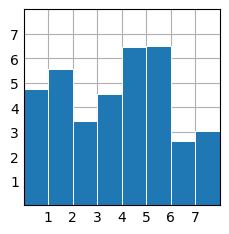

In [455]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

<AxesSubplot: >

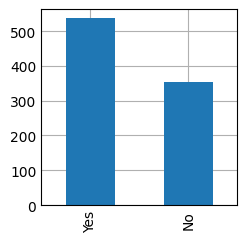

In [456]:
titanic.alone.value_counts().plot(kind= "bar")

### Discretization and Binning with pd.cut() (Part 1)

In [457]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No
5,0,Third,male,NaN,0,0,8.4583,Q,NaN,0,Yes,No
6,0,First,male,54.0,0,0,51.8625,S,E,0,Yes,No
7,0,Third,male,2.0,3,1,21.0750,S,NaN,4,No,Yes
8,1,Third,female,27.0,0,2,11.1333,S,NaN,2,No,No
9,1,Second,female,14.0,1,0,30.0708,C,NaN,1,No,Yes


In [458]:
age_bins = [0, 10, 18, 30, 55, 100]

In [459]:
cats = pd.cut(titanic.age, age_bins, right = False)

In [460]:
cats

0      [18.0, 30.0)
1      [30.0, 55.0)
2      [18.0, 30.0)
3      [30.0, 55.0)
4      [30.0, 55.0)
           ...     
886    [18.0, 30.0)
887    [18.0, 30.0)
888             NaN
889    [18.0, 30.0)
890    [30.0, 55.0)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64, left]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [461]:
cats.value_counts()

[30, 55)     288
[18, 30)     271
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: age, dtype: int64

In [462]:
titanic["age_cat"] = cats

In [463]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,"[18, 30)"
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,"[30, 55)"
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,"[18, 30)"
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,"[30, 55)"
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,"[30, 55)"


In [464]:
titanic.groupby("age_cat").survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.350554
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [465]:
group_names = ["child", "teenager", "young_adult", "adult", "elderly"]

# LABELS

In [466]:
pd.cut(titanic.age, age_bins, right = False, labels = group_names)

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888            NaN
889    young_adult
890          adult
Name: age, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'adult' < 'elderly']

In [467]:
titanic["age_cat"] = pd.cut(titanic.age, age_bins, right = False, labels = group_names)

In [468]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult
5,0,Third,male,NaN,0,0,8.4583,Q,NaN,0,Yes,No,NaN
6,0,First,male,54.0,0,0,51.8625,S,E,0,Yes,No,adult
7,0,Third,male,2.0,3,1,21.0750,S,NaN,4,No,Yes,child
8,1,Third,female,27.0,0,2,11.1333,S,NaN,2,No,No,young_adult
9,1,Second,female,14.0,1,0,30.0708,C,NaN,1,No,Yes,teenager


In [469]:
titanic.age_cat

0      young_adult
1            adult
2      young_adult
3            adult
4            adult
          ...     
886    young_adult
887    young_adult
888            NaN
889    young_adult
890          adult
Name: age_cat, Length: 891, dtype: category
Categories (5, object): ['child' < 'teenager' < 'young_adult' < 'adult' < 'elderly']

### Discretization and Binning with pd.cut() (Part 2)

In [470]:
titanic.fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

In [471]:
pd.cut(titanic.fare, 5, precision= 3)

0      (-0.512, 102.466]
1      (-0.512, 102.466]
2      (-0.512, 102.466]
3      (-0.512, 102.466]
4      (-0.512, 102.466]
             ...        
886    (-0.512, 102.466]
887    (-0.512, 102.466]
888    (-0.512, 102.466]
889    (-0.512, 102.466]
890    (-0.512, 102.466]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [472]:
pd.cut(titanic.fare, 5, precision= 0)

0      (-1.0, 102.0]
1      (-1.0, 102.0]
2      (-1.0, 102.0]
3      (-1.0, 102.0]
4      (-1.0, 102.0]
           ...      
886    (-1.0, 102.0]
887    (-1.0, 102.0]
888    (-1.0, 102.0]
889    (-1.0, 102.0]
890    (-1.0, 102.0]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-1.0, 102.0] < (102.0, 205.0] < (205.0, 307.0] < (307.0, 410.0] < (410.0, 512.0]]

In [473]:
titanic["fare_cat"] = pd.cut(titanic.fare, 5, precision= 0)

In [474]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,"(-1.0, 102.0]"
5,0,Third,male,NaN,0,0,8.4583,Q,NaN,0,Yes,No,NaN,"(-1.0, 102.0]"
6,0,First,male,54.0,0,0,51.8625,S,E,0,Yes,No,adult,"(-1.0, 102.0]"
7,0,Third,male,2.0,3,1,21.0750,S,NaN,4,No,Yes,child,"(-1.0, 102.0]"
8,1,Third,female,27.0,0,2,11.1333,S,NaN,2,No,No,young_adult,"(-1.0, 102.0]"
9,1,Second,female,14.0,1,0,30.0708,C,NaN,1,No,Yes,teenager,"(-1.0, 102.0]"


In [475]:
titanic.fare_cat.value_counts()

(-1.0, 102.0]     838
(102.0, 205.0]     33
(205.0, 307.0]     17
(410.0, 512.0]      3
(307.0, 410.0]      0
Name: fare_cat, dtype: int64

### Discretization and Binning with pd.qcut() 

In [476]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,"(-1.0, 102.0]"
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,"(-1.0, 102.0]"
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,"(-1.0, 102.0]"
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,"(-1.0, 102.0]"
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,"(-1.0, 102.0]"


In [477]:
pd.qcut(titanic.fare, 5) 

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [478]:
titanic["fare_cat"] = pd.qcut(titanic.fare, 5, precision= 0) 

In [479]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,"(-1.0, 8.0]"
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,"(40.0, 512.0]"
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,"(8.0, 10.0]"
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,"(40.0, 512.0]"
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,"(8.0, 10.0]"


In [480]:
titanic.fare_cat.value_counts()

(8.0, 10.0]      184
(22.0, 40.0]     180
(-1.0, 8.0]      179
(40.0, 512.0]    176
(10.0, 22.0]     172
Name: fare_cat, dtype: int64

In [481]:
x = pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0) 
x

0       (-0.1, 7.6]
1      (14.5, 78.0]
2       (7.9, 14.5]
3      (14.5, 78.0]
4       (7.9, 14.5]
           ...     
886     (7.9, 14.5]
887    (14.5, 78.0]
888    (14.5, 78.0]
889    (14.5, 78.0]
890      (7.6, 7.9]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.1, 7.6] < (7.6, 7.9] < (7.9, 14.5] < (14.5, 78.0] < (78.0, 512.3]]

In [482]:
x.value_counts()

(14.5, 78.0]     357
(7.9, 14.5]      224
(7.6, 7.9]       131
(-0.1, 7.6]       92
(78.0, 512.3]     87
Name: fare, dtype: int64

In [483]:
fare_labels =["very_cheap", "cheap", "moderate", "exp", "very_exp"]

In [484]:
titanic["fare_cat"] =  pd.qcut(titanic.fare, [0, 0.1, 0.25, 0.5, 0.9, 1], precision = 0, labels = fare_labels) 

In [485]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate


In [486]:
titanic.fare_cat.value_counts()

exp           357
moderate      224
cheap         131
very_cheap     92
very_exp       87
Name: fare_cat, dtype: int64

In [487]:
titanic.groupby(["age_cat", "fare_cat"]).survived.mean().unstack().round(2)

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,NaN,NaN,0.88,0.57,0.67
teenager,0.33,0.50,0.50,0.26,1.00
young_adult,0.26,0.22,0.24,0.53,0.62
adult,0.00,0.05,0.32,0.49,0.81
elderly,0.00,0.00,0.25,0.27,0.71


In [488]:
pd.crosstab(titanic.age_cat, titanic.fare_cat) # Ile osob nalezy do danej grupy

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,0,0,8,51,3
teenager,6,4,16,19,6
young_adult,31,54,90,75,21
adult,23,20,78,125,42
elderly,2,3,8,22,7


In [489]:
pd.crosstab(titanic.age_cat, titanic.fare_cat, values= titanic.survived, aggfunc= "mean"). round(2)

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,NaN,NaN,0.88,0.57,0.67
teenager,0.33,0.50,0.50,0.26,1.00
young_adult,0.26,0.22,0.24,0.53,0.62
adult,0.00,0.05,0.32,0.49,0.81
elderly,0.00,0.00,0.25,0.27,0.71


In [490]:
pd.crosstab(titanic.age_cat, titanic.fare_cat, values= titanic.fare, aggfunc= "sum")

fare_cat,very_cheap,cheap,moderate,exp,very_exp
age_cat,,,,,
child,0.0000,0.0000,91.9000,1418.8958,384.9583
teenager,43.0918,31.1125,161.1502,639.2208,757.6208
young_adult,204.6750,422.2663,935.6083,2667.4749,3457.7291
adult,125.2125,156.4290,834.3792,4403.9710,6162.4584
elderly,13.4875,23.2750,85.4875,832.8625,918.6166


### Caps and Floors

In [491]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate


In [492]:
import matplotlib.pyplot as plt

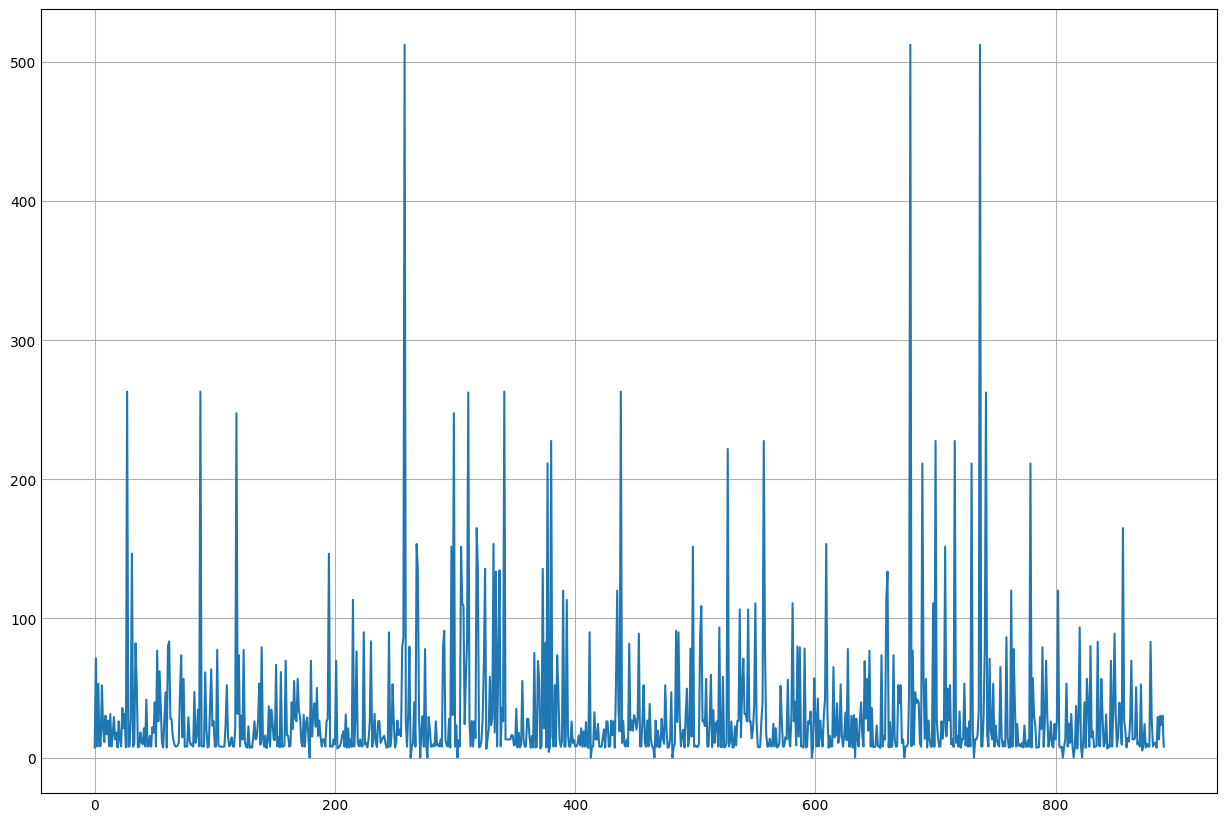

In [493]:
titanic.fare.plot(figsize = (12,8))
plt.show()

In [494]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [495]:
titanic.fare.sort_values(ascending = False)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: fare, Length: 891, dtype: float64

In [496]:
fare_cap = 250

In [497]:
titanic.loc[titanic.fare > fare_cap, "fare"] = fare_cap

In [498]:
fare_floor = 5

In [499]:
titanic.loc[titanic.fare < fare_floor, "fare"] = fare_floor

In [500]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate


### Scaling / Standardization

In [501]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat
0,0,Third,male,22.0,1,0,7.2500,S,NaN,1,No,No,young_adult,very_cheap
1,1,First,female,38.0,1,0,71.2833,C,C,1,No,No,adult,exp
2,1,Third,female,26.0,0,0,7.9250,S,NaN,0,Yes,No,young_adult,moderate
3,1,First,female,35.0,1,0,53.1000,S,C,1,No,No,adult,exp
4,0,Third,male,35.0,0,0,8.0500,S,NaN,0,Yes,No,adult,moderate


In [502]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck', 'no_relat', 'alone', 'child', 'age_cat',
       'fare_cat'],
      dtype='object')

In [503]:
titanic.drop(columns= ['sibsp', 'parch'], inplace= True)

In [504]:
titanic.describe()

,survived,age,fare,no_relat
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,31.320089,0.904602
std,0.486592,14.526497,42.517981,1.613459
min,0.000000,0.420000,5.000000,0.000000
25%,0.000000,20.125000,7.910400,0.000000
50%,0.000000,28.000000,14.454200,0.000000
75%,1.000000,38.000000,31.000000,1.000000
max,1.000000,80.000000,250.000000,10.000000


In [505]:
import matplotlib.pyplot as plt

In [506]:
fare_cap = 250
titanic.loc[titanic.fare > 250, "fare"] = fare_cap

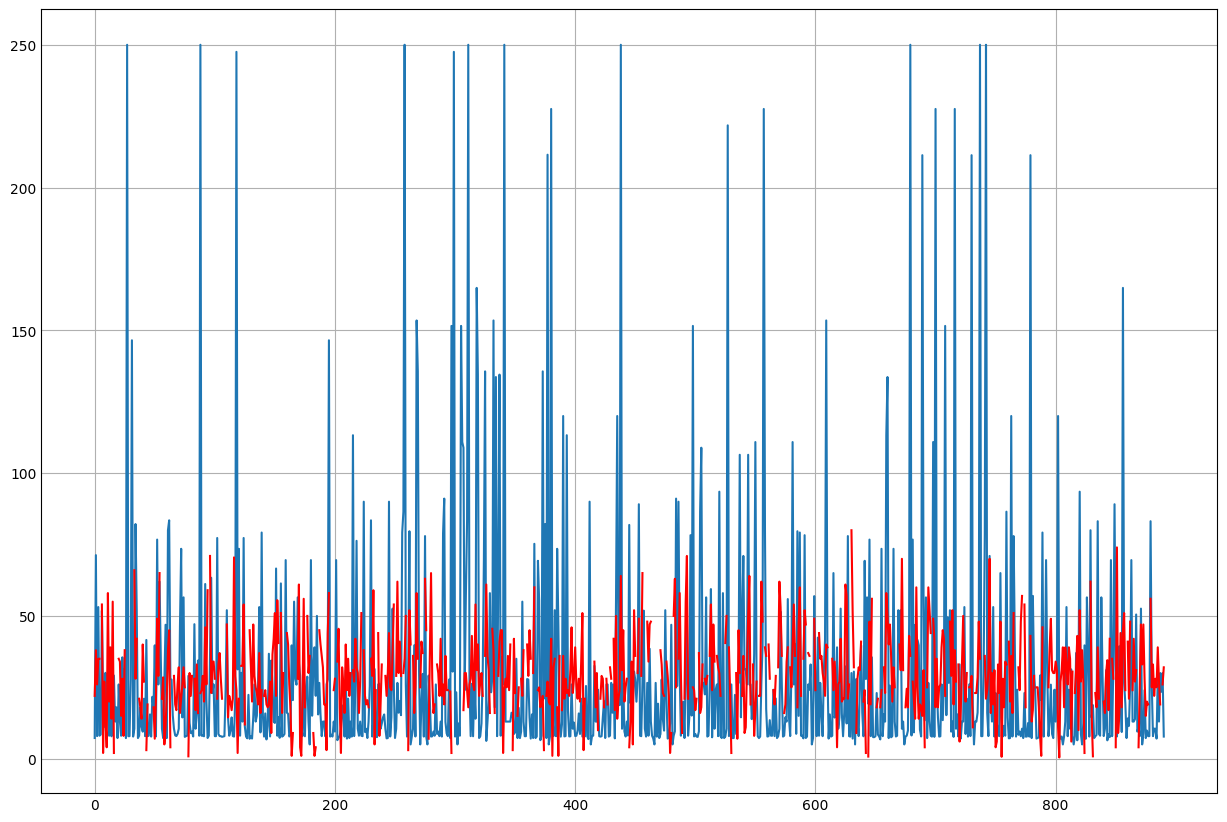

In [507]:
titanic.fare.plot(figsize = (12,8))
titanic.age.plot(figsize = (12,8), c = "red")
plt.show()

In [508]:
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()

In [509]:

std_age

14.526497332334042

In [510]:
std_age = titanic.age.std()
std_fare = titanic.fare.std()

In [511]:
titanic["age_z"] = round((titanic.age-mean_age) / std_age,2)
titanic["fare_z"] = round((titanic.fare-mean_fare) / std_fare,2)

In [512]:
titanic.head(10)

,survived,pclass,sex,age,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.0,7.2500,S,NaN,1,No,No,young_adult,very_cheap,-0.53,-0.57
1,1,First,female,38.0,71.2833,C,C,1,No,No,adult,exp,0.57,0.94
2,1,Third,female,26.0,7.9250,S,NaN,0,Yes,No,young_adult,moderate,-0.25,-0.55
3,1,First,female,35.0,53.1000,S,C,1,No,No,adult,exp,0.36,0.51
4,0,Third,male,35.0,8.0500,S,NaN,0,Yes,No,adult,moderate,0.36,-0.55
5,0,Third,male,NaN,8.4583,Q,NaN,0,Yes,No,NaN,moderate,NaN,-0.54
6,0,First,male,54.0,51.8625,S,E,0,Yes,No,adult,exp,1.67,0.48
7,0,Third,male,2.0,21.0750,S,NaN,4,No,Yes,child,exp,-1.91,-0.24
8,1,Third,female,27.0,11.1333,S,NaN,2,No,No,young_adult,moderate,-0.19,-0.47
9,1,Second,female,14.0,30.0708,C,NaN,1,No,Yes,teenager,exp,-1.08,-0.03


In [513]:
round(titanic.describe(),2)

,survived,age,fare,no_relat,age_z,fare_z
count,891.00,714.00,891.00,891.00,714.00,891.00
mean,0.38,29.70,31.32,0.90,-0.00,0.00
std,0.49,14.53,42.52,1.61,1.00,1.00
min,0.00,0.42,5.00,0.00,-2.02,-0.62
25%,0.00,20.12,7.91,0.00,-0.66,-0.55
50%,0.00,28.00,14.45,0.00,-0.12,-0.40
75%,1.00,38.00,31.00,1.00,0.57,-0.01
max,1.00,80.00,250.00,10.00,3.46,5.14


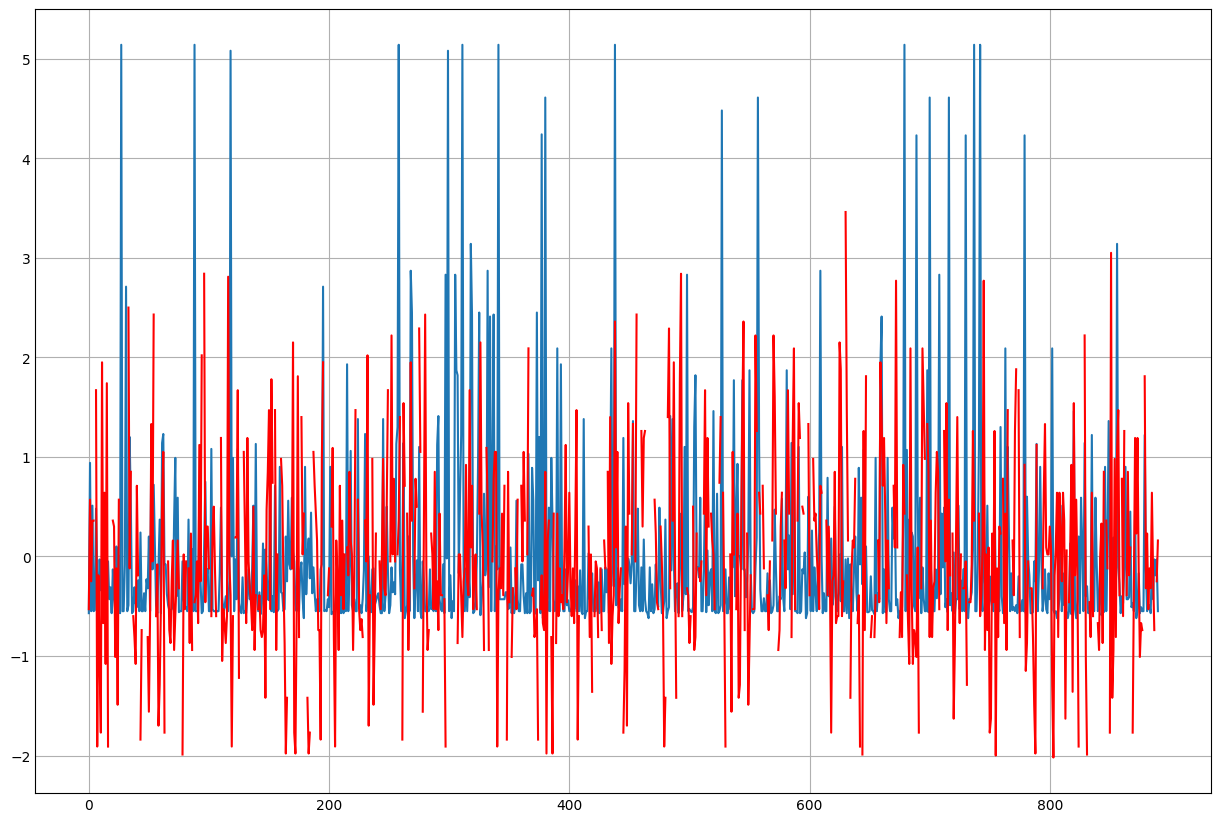

In [514]:
titanic.fare_z.plot(figsize = (12,8))
titanic.age_z.plot(figsize = (12,8), c = "red")
plt.show()

In [515]:
#titanic.to_csv("titanic_prep.csv", index = False)

In [516]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.0,7.2500,S,NaN,1,No,No,young_adult,very_cheap,-0.53,-0.57
1,1,First,female,38.0,71.2833,C,C,1,No,No,adult,exp,0.57,0.94
2,1,Third,female,26.0,7.9250,S,NaN,0,Yes,No,young_adult,moderate,-0.25,-0.55
3,1,First,female,35.0,53.1000,S,C,1,No,No,adult,exp,0.36,0.51
4,0,Third,male,35.0,8.0500,S,NaN,0,Yes,No,adult,moderate,0.36,-0.55


In [517]:
titanic.drop(labels = ["age", "alone", "child", "age_z", "fare_z", "fare_cat"], axis = 1, inplace = False)

,survived,pclass,sex,fare,embarked,deck,no_relat,age_cat
0,0,Third,male,7.2500,S,NaN,1,young_adult
1,1,First,female,71.2833,C,C,1,adult
2,1,Third,female,7.9250,S,NaN,0,young_adult
3,1,First,female,53.1000,S,C,1,adult
4,0,Third,male,8.0500,S,NaN,0,adult
...,...,...,...,...,...,...,...,...
886,0,Second,male,13.0000,S,NaN,0,young_adult
887,1,First,female,30.0000,S,B,0,young_adult
888,0,Third,female,23.4500,S,NaN,3,NaN
889,1,First,male,30.0000,C,C,0,young_adult


### Creating Dummy Variables

In [518]:
titanic.head()

,survived,pclass,sex,age,fare,embarked,deck,no_relat,alone,child,age_cat,fare_cat,age_z,fare_z
0,0,Third,male,22.0,7.2500,S,NaN,1,No,No,young_adult,very_cheap,-0.53,-0.57
1,1,First,female,38.0,71.2833,C,C,1,No,No,adult,exp,0.57,0.94
2,1,Third,female,26.0,7.9250,S,NaN,0,Yes,No,young_adult,moderate,-0.25,-0.55
3,1,First,female,35.0,53.1000,S,C,1,No,No,adult,exp,0.36,0.51
4,0,Third,male,35.0,8.0500,S,NaN,0,Yes,No,adult,moderate,0.36,-0.55


In [519]:
titanic.drop(labels = ["age", "alone", "child", "age_z", "fare_z", "fare_cat"], axis = 1, inplace = True)

In [520]:
titanic.head()

,survived,pclass,sex,fare,embarked,deck,no_relat,age_cat
0,0,Third,male,7.2500,S,NaN,1,young_adult
1,1,First,female,71.2833,C,C,1,adult
2,1,Third,female,7.9250,S,NaN,0,young_adult
3,1,First,female,53.1000,S,C,1,adult
4,0,Third,male,8.0500,S,NaN,0,adult


In [521]:
pd.get_dummies(titanic, columns = ["sex"])

,survived,pclass,fare,embarked,deck,no_relat,age_cat,sex_female,sex_male
0,0,Third,7.2500,S,NaN,1,young_adult,0,1
1,1,First,71.2833,C,C,1,adult,1,0
2,1,Third,7.9250,S,NaN,0,young_adult,1,0
3,1,First,53.1000,S,C,1,adult,1,0
4,0,Third,8.0500,S,NaN,0,adult,0,1
...,...,...,...,...,...,...,...,...,...
886,0,Second,13.0000,S,NaN,0,young_adult,0,1
887,1,First,30.0000,S,B,0,young_adult,1,0
888,0,Third,23.4500,S,NaN,3,NaN,1,0
889,1,First,30.0000,C,C,0,young_adult,0,1


Nie ma sensu HOT ONE CODOWAĆ, płci na kolumny sex_male i sex_female, bo gdy w jednej jest wartosc 1 w drugiej napewno bedzie wartość 0. argument __drop_first__ wywala jedną z kolumn. Nazywa sie to __K-1 transformatioon__


In [522]:
titanic_d = pd.get_dummies(titanic, columns = ["sex", "pclass", "embarked", "age_cat"], drop_first=True)

In [524]:
titanic_d.head()

,survived,fare,deck,no_relat,sex_male,pclass_Second,pclass_Third,embarked_Q,embarked_S,age_cat_teenager,age_cat_young_adult,age_cat_adult,age_cat_elderly
0,0,7.2500,NaN,1,1,0,1,0,1,0,1,0,0
1,1,71.2833,C,1,0,0,0,0,0,0,0,1,0
2,1,7.9250,NaN,0,0,0,1,0,1,0,1,0,0
3,1,53.1000,C,1,0,0,0,0,1,0,0,1,0
4,0,8.0500,NaN,0,1,0,1,0,1,0,0,1,0


In [ ]:
titanic_d.info()

### String Operations

In [ ]:
import pandas as pd

In [ ]:
summer = pd.read_csv("summer.csv")

In [ ]:
summer.head()

In [ ]:
summer.Athlete = summer.Athlete.str.title()

In [ ]:
summer.Athlete.str.split(", ", n = 1, expand = True)

In [ ]:
summer[["Surname", "First_Name"]] = summer.Athlete.str.split(", ", n = 1, expand = True)

In [ ]:
summer.head()

In [ ]:
summer["Surname"] = summer.Surname.str.strip()

In [ ]:
summer["First_Name"] = summer.First_Name.str.strip()

In [ ]:
summer.drop(columns = "Athlete")